In [25]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.0.1/libexec/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [2]:
# 데이터 로드
df = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-04-btc-krw.csv")

In [3]:
# 칼럼 데이터 타입 확인
df.dtypes

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [4]:
# timestamp 칼럼 타입을 'object'에서 'datetime'으로 바꾸기
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price                 int64
fee                   int64
amount                int64
side                  int64
dtype: object

In [5]:
## converting timestamp to detailed date column
df['timestamp_year_month_day'] = df['timestamp'].dt.date         # YYYY-MM-DD(문자)
df['timestamp_year'] = df['timestamp'].dt.year         # 연(4자리숫자)
df['timestamp_month'] = df['timestamp'].dt.month        # 월(숫자)
df['timestamp_month_name'] = df['timestamp'].dt.month_name() # 월(문자)
df['timestamp_day'] = df['timestamp'].dt.day          # 일(숫자)
df['timestamp_time'] = df['timestamp'].dt.time         # HH:MM:SS(문자)
df['timestamp_hour'] = df['timestamp'].dt.hour         # 시(숫자)
df['timestamp_minute'] = df['timestamp'].dt.minute       # 분(숫자)
df['timestamp_second'] = df['timestamp'].dt.second       # 초(숫자)

In [6]:
# Date
# 'date - amount' 데이터 프레임 만들기
group_date_amount = df['amount'].groupby(df['timestamp_day'])

In [7]:
# date 별 sell - buy 금액
group_date_amount.sum()

timestamp_day
1      1386872
2    -21457689
3     23933671
4     -6326630
5     -1360634
6     10139368
7      1339931
8    -11691662
9     -3960911
10    12016914
11    -5561908
12     -914872
13    -9821100
14     3804128
15    -9266205
16    30707319
17     -474549
18     1721406
19      890354
20     2101743
21   -34376634
22    22892512
23   -24091452
24    39752051
25     2419432
26    -4840848
27   -23839081
28     9683467
29    20795312
30       75735
Name: amount, dtype: int64

In [8]:
# 'date - buy amount' connection 만들기
df2 = df.copy()
df2 = df2[df2['amount'] > 0]
group_date_amount_positive = df2['amount'].groupby(df2['timestamp_day'])

In [9]:
# date 별 sell amount 총합 (positive)
group_date_amount_positive.sum()

timestamp_day
1      790414965
2      950454757
3     1309994311
4     1981767991
5     1915700797
6     1004494722
7      924544880
8     1167014992
9     2338009925
10    1689052815
11    1226544111
12    2706995233
13    2302904135
14    1017852716
15    1089467498
16    1339980208
17     952021004
18    1143349230
19    1452070241
20    2023523659
21    2256308015
22    1161811293
23    1507810816
24    1586486845
25    2304753922
26    2042726635
27    1858617537
28    1550586150
29    1032470610
30    1007830212
Name: amount, dtype: int64

In [10]:
 # 'date - buy amount' connection 만들기
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_date_amount_negative = df3['amount'].groupby(df3['timestamp_day'])

In [11]:
# date 별 buy amount 총 합
group_date_amount_negative.sum()

timestamp_day
1     -789028093
2     -971912446
3    -1286060640
4    -1988094621
5    -1917061431
6     -994355354
7     -923204949
8    -1178706654
9    -2341970836
10   -1677035901
11   -1232106019
12   -2707910105
13   -2312725235
14   -1014048588
15   -1098733703
16   -1309272889
17    -952495553
18   -1141627824
19   -1451179887
20   -2021421916
21   -2290684649
22   -1138918781
23   -1531902268
24   -1546734794
25   -2302334490
26   -2047567483
27   -1882456618
28   -1540902683
29   -1011675298
30   -1007754477
Name: amount, dtype: int64

In [12]:
# date 별 절대값 총합
# negative는 buy
absolute_date_negative_sum = group_date_amount_negative.sum()
absolute_date_negative_sum = absolute_date_negative_sum * (-1)
# total은 sell - buy
absolute_date_total_amount = absolute_date_negative_sum+group_date_amount_positive.sum()
absolute_date_total_amount


timestamp_day
1     1579443058
2     1922367203
3     2596054951
4     3969862612
5     3832762228
6     1998850076
7     1847749829
8     2345721646
9     4679980761
10    3366088716
11    2458650130
12    5414905338
13    4615629370
14    2031901304
15    2188201201
16    2649253097
17    1904516557
18    2284977054
19    2903250128
20    4044945575
21    4546992664
22    2300730074
23    3039713084
24    3133221639
25    4607088412
26    4090294118
27    3741074155
28    3091488833
29    2044145908
30    2015584689
Name: amount, dtype: int64

In [13]:

# date 별 계산 table 생성
dfs = [group_date_amount.size(), group_date_amount.sum(), group_date_amount_positive.size(), group_date_amount_positive.sum(), group_date_amount_negative.size(), group_date_amount_negative.sum(), absolute_date_negative_sum]
day_df_date_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_day'), dfs)
day_df_date_final.columns = [ "Date transaction", "Date sell-buy", "Date sell transaction", "Date sell", "Date buy transaction", "Date buy", "Date absolute buy"]
day_df_date_final

,Date transaction,Date sell-buy,Date sell transaction,Date sell,Date buy transaction,Date buy,Date absolute buy
timestamp_day,,,,,,,
1,574,1386872,362,790414965,212,-789028093,789028093
2,659,-21457689,415,950454757,244,-971912446,971912446
3,810,23933671,441,1309994311,369,-1286060640,1286060640
4,1210,-6326630,727,1981767991,483,-1988094621,1988094621
5,1108,-1360634,683,1915700797,425,-1917061431,1917061431
6,756,10139368,457,1004494722,299,-994355354,994355354
7,538,1339931,336,924544880,202,-923204949,923204949
8,723,-11691662,418,1167014992,305,-1178706654,1178706654
9,1342,-3960911,778,2338009925,564,-2341970836,2341970836


In [14]:
# table 저장하기
day_df_date_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/date_result_table.csv", header=True, index=True, encoding = 'utf-8')

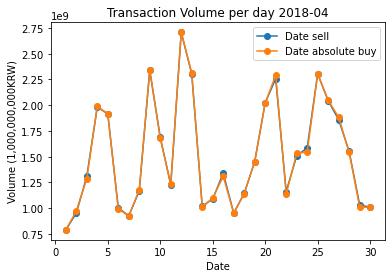

In [18]:
# Date - transaction 금액 그래프 그리기
dayTransVolGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot(title='Transaction Volume per day 2018-04', marker='o')
dayTransVolGraph.set_xlabel('Date')
dayTransVolGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-04-Trans_Vol_per_day.png', dpi=300)

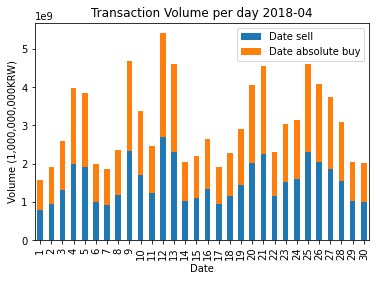

In [19]:
dayTransGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot.bar(title='Transaction Volume per day 2018-04', stacked=True)
dayTransGraph.set_xlabel('Date')
dayTransGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-04-Trans_Vol_per_day(stacked).png', dpi=300)

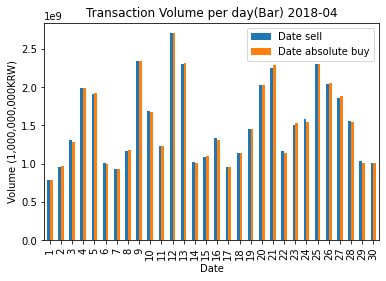

In [20]:
dayTransBarGraph = day_df_date_final[['Date sell', 'Date absolute buy']].plot.bar(title='Transaction Volume per day(Bar) 2018-04')
dayTransBarGraph.set_xlabel('Date')
dayTransBarGraph.set_ylabel('Volume (1,000,000,000KRW)')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/bithumb-2018-04-Trans_Vol_per_day(bar).png', dpi=300)